# Detectie van gezichten

### Stijn Oomes
donderdag 4 februari 2021

## Importeer libraries

Importeer de relevante libraries.

`opencv` en wellicht `matplotlib`

Hint: `imread`, `imshow`

In [140]:
import cv2
import matplotlib.pyplot as plt
import scipy as sci

## Importeer en toon afbeelding

Zoek een kleuren foto met minimaal 10 gezichten.

Laad de afbeelding in. Welk datatype heeft de ingeladen afbeelding?


 Laat de foto op het scherm zien. Hoeveel gezichten zie jij?

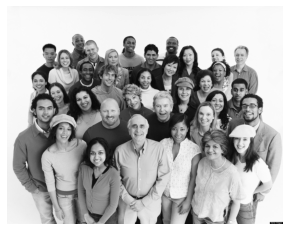

In [141]:
gray = cv2.imread("pictouse.jpg", 0)
plt.axis('off')
plt.imshow(gray, cmap='gray')

## Initieer detector

Download de .xml file met de classifier: haarcascade_frontalface_default.xml

(Het kan zijn dat deze file al meegekomen is met opencv)

Initieer de Cascade Classiefier.

In [142]:
face_cascade  = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

## Zet een kleurenplaatje om in een grijswaarde plaatje.

Als je foto al zrwrt-wit is dan kun je deze stap overslaan.

## Detecteer gezichten

Bepaal met de classiefier de gezichten in het plaatje.

Hoeveel heb je er gevonden?

In [143]:
faces = face_cascade.detectMultiScale(
        gray,
        scaleFactor=1.2,
        minNeighbors=5,
        minSize=(10, 10),
        flags=cv2.CASCADE_SCALE_IMAGE)

## Toon rechthoeken rond gezichten

Toon rechthoeken om de gevonden gezichten.

True

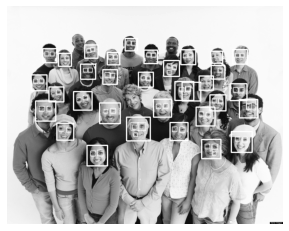

In [144]:
for (x,y,w,h) in faces:
    cv2.rectangle(gray,(x,y),(x+w,y+h),(255,255,255),5)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = gray[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(255,255,255),2)

plt.axis('off')
plt.imshow(gray, cmap='gray')
cv2.imwrite('result.jpg', gray)

## Evalueer de resultaten

Hoe goed is jouw detector in vergeleijking met wat je zelf ziet?

Vrij goed, op een paar uitzondering na, maar uiteindelijk is je eigen zicht nog steeds beter. Hij mistte een paar
gezichten, en zag een paar monden aan voor ogen.

## Bonus: detecteer ook de ogen en de mond.

Een extra uitdaging.